In [1]:

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl


In [2]:

ZS13 = h5py.File("../ZafrensData/zel024/microscopy/ZS13.segmentations.h5", "r+")
ZS25 = h5py.File("../ZafrensData/zel024/microscopy/ZS25.segmentations.h5", "r+")
#ZS26 = h5py.File("../ZafrensData/zel031/microscopy/ZS26.segmentations.h5", "r+")
#ZS27 = h5py.File("../ZafrensData/zel031/microscopy/ZS27.segmentations.h5", "r+")


In [3]:

Z13_image_dataset = ZS13["images"][()]
Z25_image_dataset = ZS25["images"][()]
#Z26_image_dataset = ZS26["images"][()]
#Z27_image_dataset = ZS27["images"][()]


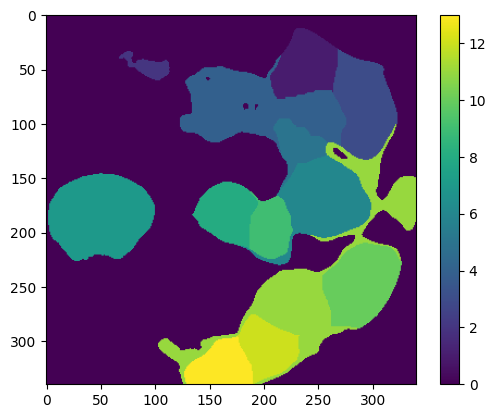

In [4]:

plt.imshow(Z25_image_dataset[10]) 
plt.colorbar()  # Add a colorbar to visualize the label values
plt.show()


In [5]:

all_images = np.concatenate((Z13_image_dataset, Z25_image_dataset
                            # ,Z26_image_dataset, Z27_image_dataset
                            ), axis=0)


In [6]:

all_images.shape


(32571, 340, 340)

In [7]:

Z13_image_barcode = pd.read_csv("../ZafrensData/zel024/microscopy/ZS13_dim_0_metadata.csv")
Z25_image_barcode = pd.read_csv("../ZafrensData/zel024/microscopy/ZS25_dim_0_metadata.csv")
#Z26_image_barcode = pd.read_csv("../ZafrensData/zel031/microscopy/ZS26_dim_0_metadata.csv")
#Z27_image_barcode = pd.read_csv("../ZafrensData/zel031/microscopy/ZS27_dim_0_metadata.csv")


In [8]:

# Columns to concatenate
columns_to_concat = ['physical_well_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'bb3_id', 'bb4_id', 'censored']

# Concatenate columns with an underscore separator
Z13_image_barcode['sample'] = Z13_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)
Z25_image_barcode['sample'] = Z25_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)

# Columns to concatenate
#Z26_image_barcode['bb4_id'] = 1
#Z26_image_barcode['bb3_id'] = 1

#Z27_image_barcode['bb4_id'] = 1
#Z27_image_barcode['bb3_id'] = 1

#columns_to_concat = ['physical_well_id', 'control_rx_id', 'bb1_id', 'bb2_id', 'censored']

#Z26_image_barcode['sample'] = Z26_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)
#Z27_image_barcode['sample'] = Z27_image_barcode[columns_to_concat].astype(str).agg('_'.join, axis=1)



In [9]:

merged_df = pd.concat([Z13_image_barcode, Z25_image_barcode
                      # , Z26_image_barcode, Z27_image_barcode
                      ], axis=0, join="inner").reset_index()


In [10]:
merged_df

,index,hdf5_dim_0_index,physical_well_id,control_rx_id,bb1_id,bb2_id,bb3_id,bb4_id,censored,sample
0,0,0,50,-1,213,417,1,1387,False,50_-1_213_417_1_1387_False
1,1,1,51,-1,-1,-1,-1,-1,True,51_-1_-1_-1_-1_-1_True
2,2,2,60,-1,207,123,2,1411,False,60_-1_207_123_2_1411_False
3,3,3,62,-1,207,352,2,1554,False,62_-1_207_352_2_1554_False
4,4,4,305,-1,215,420,1,1489,False,305_-1_215_420_1_1489_False
...,...,...,...,...,...,...,...,...,...,...
32566,21905,21905,49274,-1,-1,-1,-1,-1,True,49274_-1_-1_-1_-1_-1_True
32567,21906,21906,49278,1,-1,-1,-1,-1,False,49278_1_-1_-1_-1_-1_False
32568,21907,21907,49278,1,-1,-1,-1,-1,False,49278_1_-1_-1_-1_-1_False
32569,21908,21908,49282,-1,-1,-1,-1,-1,True,49282_-1_-1_-1_-1_-1_True


In [11]:

merged_df_not_censored = merged_df[merged_df['censored'] == False]


In [12]:

merged_df_not_censored.shape


(24577, 10)

In [13]:

merged_df_not_censored


,index,hdf5_dim_0_index,physical_well_id,control_rx_id,bb1_id,bb2_id,bb3_id,bb4_id,censored,sample
0,0,0,50,-1,213,417,1,1387,False,50_-1_213_417_1_1387_False
2,2,2,60,-1,207,123,2,1411,False,60_-1_207_123_2_1411_False
3,3,3,62,-1,207,352,2,1554,False,62_-1_207_352_2_1554_False
4,4,4,305,-1,215,420,1,1489,False,305_-1_215_420_1_1489_False
5,5,5,306,-1,202,352,1,440,False,306_-1_202_352_1_440_False
...,...,...,...,...,...,...,...,...,...,...
32562,21901,21901,49269,-1,205,420,2,1497,False,49269_-1_205_420_2_1497_False
32563,21902,21902,49270,-1,269,422,1,1613,False,49270_-1_269_422_1_1613_False
32564,21903,21903,49270,-1,269,422,1,1613,False,49270_-1_269_422_1_1613_False
32567,21906,21906,49278,1,-1,-1,-1,-1,False,49278_1_-1_-1_-1_-1_False


In [14]:

df_unique = merged_df_not_censored.drop_duplicates(subset=['sample'])


In [15]:
df_unique

,index,hdf5_dim_0_index,physical_well_id,control_rx_id,bb1_id,bb2_id,bb3_id,bb4_id,censored,sample
0,0,0,50,-1,213,417,1,1387,False,50_-1_213_417_1_1387_False
2,2,2,60,-1,207,123,2,1411,False,60_-1_207_123_2_1411_False
3,3,3,62,-1,207,352,2,1554,False,62_-1_207_352_2_1554_False
4,4,4,305,-1,215,420,1,1489,False,305_-1_215_420_1_1489_False
5,5,5,306,-1,202,352,1,440,False,306_-1_202_352_1_440_False
...,...,...,...,...,...,...,...,...,...,...
32555,21894,21894,49257,-1,222,418,2,1544,False,49257_-1_222_418_2_1544_False
32559,21898,21898,49260,-1,201,195,1,1418,False,49260_-1_201_195_1_1418_False
32561,21900,21900,49269,-1,205,420,2,1497,False,49269_-1_205_420_2_1497_False
32563,21902,21902,49270,-1,269,422,1,1613,False,49270_-1_269_422_1_1613_False


In [16]:

all_images


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:

selected_indices = df_unique.index.values  # or some filtered indices like metadata[metadata['label'] == 'A'].index.values


In [18]:

selected_images = all_images[selected_indices]


In [19]:

selected_images.shape


(20386, 340, 340)

In [20]:
with open("../ZafrensData/final_dataset/images_zel024_34K.pkl", "wb") as file:
    pkl.dump(selected_images, file)

In [21]:
with open("../ZafrensData/final_dataset/images_metadata_zel024_34K.pkl", "wb") as file:
    pkl.dump(df_unique, file)